In [18]:
# Este notebook está prestes a entender os requisitos de dados, limpeza e recomendação simples baseada em arquivos populares.

# Modelos de recomendação Book

#Import das Bibliotecas basicas .
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

import os, sys
import re


In [ ]:
#EDA 

In [19]:
books = pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [20]:
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
#Renomear Colunas e verificar o tamanho do  DataSet 

books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [23]:
# dropping as ultimas três  colunas que contem Url de imagens  que nao serão necessarias para nossa Aanalise.

books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)



In [24]:
#Verificar os tipos de dados no dataset
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [31]:
#Estatistica basica do Dataset

In [32]:
# Arqui tambem podemos vizualizar dados como ano de publicação do arquivo. 

books.describe() 

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [ ]:
#  Limpeza de Dados. 

# Nesse proximo topico vamos realizar a limpeza e tratamento dos dados em um todo. 

#Como pode ser visto a seguir, existem algumas entradas incorretas neste campo. Parece que os nomes do editor 'DK Publishing Inc' e 'Gallimard' foram carregados incorretamente como yearOfPublication no conjunto de dados devido a alguns erros no arquivo csv Além disso, algumas das entradas são strings e os mesmos anos foram inseridos como números em alguns lugares.

# Nesse argumento vamos destacar a  ultilização da função  .loc basicamente ele é usado quando queremos selecionar dados de linhas e colunas pelo seu valor numérico de índice

In [33]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [36]:
#Observando o output acima , é visto que bookAuthor está incorretamente carregado com bookTitle

# Vamos fazer as correções usando a função .loc .

#ISBN '0789466953'  (RG DOS LIVROS )
books.loc[books.ISBN == '0789466953','yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953','bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','bookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'  (RG DOS LIVROS )
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','bookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


#Verificar Correções realizadas.  


books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

#Correções Feitas com sucesso . :)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [38]:
#Verificando  as linhas com 'Gallimard' como yearOfPublication
books.loc[books.yearOfPublication == 'Gallimard',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [39]:
#Fazendo as correções necessárias conforme acima, mantendo os outros campos intactos


books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','bookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [41]:
#Agora pode ser visto que yearOfPublication tem todos os valores como inteiros

books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

print(sorted(books['yearOfPublication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [42]:

#No entanto, o valor 0 é inválido e como este conjunto de dados foi publicado em 2004, assumimos que os anos posteriores a 2006 foram
#inválido mantendo alguma margem no caso de o conjunto de dados ter sido atualizado posteriormente
#definindo anos inválidos como NaN.

books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN


In [45]:
#Substituindo valores Faltantes por Media da Variavel yearOfPublication (Ano da Publicação)
#Usando Função .fillna .

books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [46]:
# Verificando a existencia de arquivos faltantes na variavel  yearOfPublication

books.yearOfPublication.isnull().sum()

#Sem Arquivos Faltantes. 


0

In [47]:
#Redefinindo o Tipo de dados como Inteiro 

books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [49]:
#explorando a coluna 'Publisher'


books.loc[books.publisher.isnull(),:]
#Verificamos que existe dois dados faltantes na coluna Publisher

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [50]:
#Explorando  linhas com NaNs dados faltantes. 

#Verificando as linhas com o título de livro como Tyrant Moon para ver se podemos obter alguma pista.

books.loc[(books.bookTitle == 'Tyrant Moon'),:]

#Conforme mostra o Output nao tivemos exito .

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN


In [51]:
# Mais uma tentativa para encontrarmos pistas. 

books.loc[(books.bookTitle == 'Finders Keepers'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
134309,0156309505,Finders Keepers,Will,1989,Voyager Books
173473,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications
195885,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch
211874,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library


In [52]:
#Vamos tentar encontrar Padrões na colula bookAuthor.  

books.loc[(books.bookAuthor == 'Elaine Corvidae'),:]

#Conforme mostra abaixo todos tem editores diferentes, assim nao conseguindo encontrar padrões . 

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129001,0759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory


In [53]:
books.loc[(books.bookAuthor == 'Linnea Sinclair'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [54]:
# Uma vez que não há nada em comum para inferir o editor para NaNs, substituindo-os por 'outros

books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

In [56]:
#dataset users. EDA

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [61]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


<AxesSubplot:>

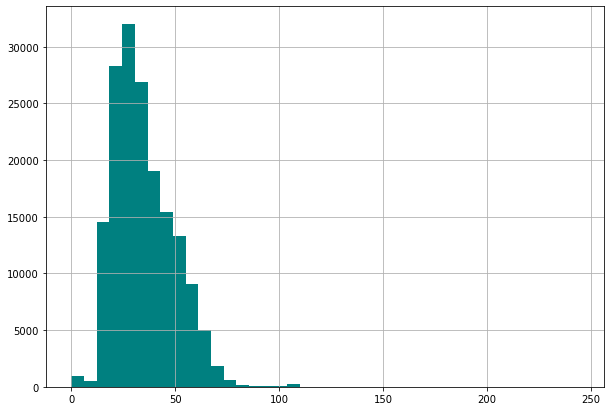

In [62]:
plt.figure(figsize=(10, 7))
users.Age.hist(bins=40, color='teal')
#A coluna de (Age) idade tem algumas entradas inválidas, como nan, 0 e valores muito altos, como 100 e acima.

In [64]:
#Na minha opinião, valores abaixo de 5 e acima de 90 não fazem muito sentido para nosso caso de classificação de livros ... portanto, substituí-los por NaNs

users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [65]:
#Substituindo NAN por MEDIA . 
users.Age = users.Age.fillna(users.Age.mean())

#Definindo tipo de dados como Inteiro.   .int
users.Age = users.Age.astype(np.int32)

<AxesSubplot:xlabel='Age'>

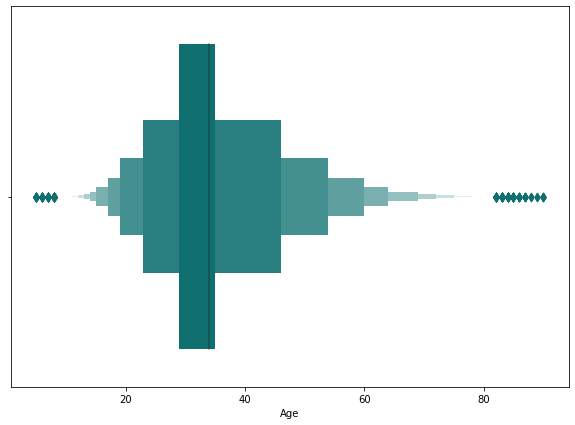

In [66]:
#Visualizando Media de idades com maior numero .

plt.figure(figsize=(10, 7))
sns.boxenplot(users.Age, color='teal')

In [ ]:
#Ratings Dataset

#EDA

In [67]:
#Visualizar quantidade de linhas e colunas
ratings.shape

(1149780, 3)

In [69]:
#O conjunto de dados de classificações terá entradas n_users * n_books se cada usuário classificou cada item, isso mostra que o conjunto de dados é muito esparso

n_users = users.shape[0]
n_books = books.shape[0]
n_users * n_books

75670906880

In [70]:
#A função unique no Pandas retorna uma lista dos elementos únicos com base na ocorrência. Esta função é mais rápida do que a unique do NumPy e também inclui valores NaN.
#Isso é particularmente útil para verificar os diferentes valores em um campo categórico.

ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [74]:
#O conjunto de dados de classificações deve ter apenas livros que existam em nosso conjunto de dados de livros, a menos que novos livros sejam adicionados ao conjunto de dados de livros
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

ratings.shape,ratings_new.shape
# pode ser visto que muitas linhas com ISBN de livro que não faz parte do conjunto de dados de livros foram descartadas

((1149780, 3), (1031136, 3))

In [75]:
#O conjunto de dados de classificações deve ter classificações de usuários que existem no conjunto de dados de usuários, a menos que novos usuários sejam adicionados ao conjunto de dados de usuários
ratings = ratings[ratings['User-ID'].isin(users['User-ID'])]

print(ratings.shape)
print(ratings_new.shape)
#nenhum novo usuário foi adicionado, portanto, usaremos o conjunto de dados acima, ratings_new (1031136, 3)

(n_users), (n_books)

(1149780, 3)
(1031136, 3)


(278858, 271360)

In [ ]:
#Conforme citado na descrição do conjunto de dados - 
#BX-Book-Ratings contém as informações de classificação do livro. 
#As classificações são explícitas, expressas em uma escala de 1-10 valores mais altos, denotando maior apreciação, ou implícitas, expressas por 0

In [82]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [77]:
#separação de  conjuntos de dados de classificações implícitas e explícitas

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]

ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

(1031136, 3)
(383842, 3)
(647294, 3)


<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

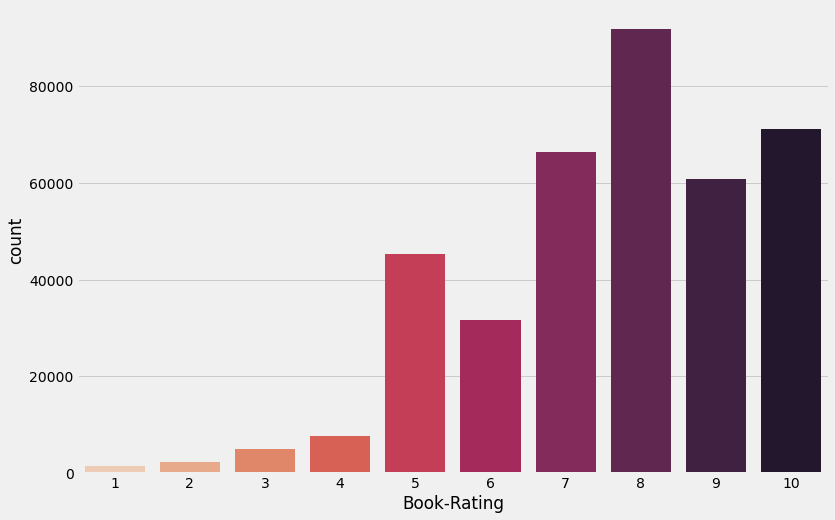

In [83]:
# Plotar Grafico para visualizar Classificação entre  Usuarios 

print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

In [ ]:

#Pode-se ver que as classificações mais altas são mais comuns entre os usuários e a classificação 8 foi classificada com o maior número de vezes.

# Vimos que nossa melhor classificação foi a 8 .

In [ ]:
#Principal recomendação baseada em popularidade

In [85]:
#Neste ponto, um sistema de recomendação simples baseado em popularidade pode ser construído com 
#base na contagem de classificações de usuários para diferentes livro.



#Modelo de recomendação Simples. 

In [86]:
#Livros com maior popularidade. 
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())
top10 = ratings_count.sort_values('Book-Rating', ascending = False).head(10)

top10.merge(books, left_index = True, right_on = 'ISBN')

#Abaixo estão as 10 principais recomendações com base na popularidade. 
#É evidente que os livros de autoria de J.K. Rowling são mais populares

,Book-Rating,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [87]:
#Da mesma forma, segregar usuários que deram classificações explícitas de 1 a 10 e aqueles cujo comportamento implícito foi rastreado

users_exp_ratings = users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_ratings = users[users['User-ID'].isin(ratings_implicit['User-ID'])]

In [89]:
#Verificação  shapes

print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)

(278858, 3)
(68091, 3)
(52451, 3)


In [ ]:
TBD

In [ ]:
#NEste tipo de recomendação é geral e não específico do usuário e geralmente usado na IU do usuário público em sistemas de recomendação. 
#Se você está trabalhando em filtragem colaborativa ou métodos mais avançados para seu sistema de gravação ou está lidando com problemas de inicialização a frio, entretanto, este tipo de recomendação (baseada em popularidade) pode ser usada.